<a href="https://colab.research.google.com/github/jonny4899/AndroidProgram/blob/master/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт библиотек
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Создание объектов переменных
price = ctrl.Antecedent(np.arange(0, 101, 1), 'price')
needs = ctrl.Antecedent(np.arange(0, 101, 1), 'needs')
compatibility = ctrl.Antecedent(np.arange(0, 101, 1), 'compatibility')
priority = ctrl.Consequent(np.arange(0, 101, 1), 'priority')

# Автоматическое создание функций принадлежности для выходной переменной
priority.automf(names=['low', 'medium', 'high'])

# Определение функций принадлежности для входных переменных (треугольные)
# Цена
price['low'] = fuzz.trimf(price.universe, [0, 0, 50])
price['medium'] = fuzz.trimf(price.universe, [25, 50, 75])
price['high'] = fuzz.trimf(price.universe, [50, 100, 100])

# Потребности
needs['basic'] = fuzz.trimf(needs.universe, [0, 0, 40])
needs['advanced'] = fuzz.trimf(needs.universe, [30, 50, 70])
needs['expert'] = fuzz.trimf(needs.universe, [60, 100, 100])

# Совместимость
compatibility['low'] = fuzz.trimf(compatibility.universe, [0, 0, 40])
compatibility['medium'] = fuzz.trimf(compatibility.universe, [30, 50, 70])
compatibility['good'] = fuzz.trimf(compatibility.universe, [60, 100, 100])

# Визуализация функций принадлежности (для отчета)
# price.view()
# needs.view()
# compatibility.view()
# priority.view()
# plt.show()

# Создание базы нечетких правил
rule1 = ctrl.Rule(price['low'] & needs['basic'] & compatibility['good'], priority['high'])
rule2 = ctrl.Rule(price['medium'] & needs['advanced'] & compatibility['medium'], priority['medium'])
rule3 = ctrl.Rule(price['high'] & needs['expert'] & compatibility['low'], priority['low'])
rule4 = ctrl.Rule(price['low'] & needs['basic'] & compatibility['medium'], priority['medium'])
rule5 = ctrl.Rule(price['medium'] & needs['expert'] & compatibility['good'], priority['medium'])
rule6 = ctrl.Rule(price['high'] & needs['advanced'] & compatibility['good'], priority['medium'])
rule7 = ctrl.Rule(price['high'] & needs['expert'] & compatibility['good'], priority['low'])

# Создание системы управления и симулятора
priority_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
priority_sim = ctrl.ControlSystemSimulation(priority_ctrl)

print("Нечеткая система успешно создана!")

Нечеткая система успешно создана!


In [ ]:
print("\n" + "="*60)
print("ПРОВЕРКА БАЗЫ ПРАВИЛ НА ПОЛНОТУ")
print("="*60)

# Проверка 1: Покрытие выходных термов
print("\n1. ПРОВЕРКА ВЫХОДНЫХ ТЕРМОВ (Приоритет):")
print("   Терм 'низкий' (low): правила 3, 7")
print("   Терм 'средний' (medium): правила 2, 4, 5, 6")
print("   Терм 'высокий' (high): правило 1")
print("   ВЫВОД: ✅ Все выходные термы покрыты хотя бы одним правилом.")

# Проверка 2: Покрытие входных термов
print("\n2. ПРОВЕРКА ВХОДНЫХ ТЕРМОВ:")
print("   - Цена:")
print("       * низкая (low): правила 1, 4")
print("       * средняя (medium): правила 2, 5")
print("       * высокая (high): правила 3, 6, 7")
print("   - Потребности:")
print("       * базовые (basic): правила 1, 4")
print("       * продвинутые (advanced): правила 2, 6")
print("       * экспертные (expert): правила 3, 5, 7")
print("   - Совместимость:")
print("       * низкая (low): правило 3")
print("       * средняя (medium): правила 2, 4")
print("       * хорошая (good): правила 1, 5, 6, 7")
print("\n   ВЫВОД: ✅ Для каждого терма входных переменных существует хотя бы одно правило.")

print("\n" + "="*60)
print("✅ БАЗА ПРАВИЛ ЯВЛЯЕТСЯ ПОЛНОЙ!")
print("="*60)


ПРОВЕРКА БАЗЫ ПРАВИЛ НА ПОЛНОТУ

1. ПРОВЕРКА ВЫХОДНЫХ ТЕРМОВ (Приоритет):
   Терм 'низкий' (low): правила 3, 7
   Терм 'средний' (medium): правила 2, 4, 5, 6
   Терм 'высокий' (high): правило 1
   ВЫВОД: ✅ Все выходные термы покрыты хотя бы одним правилом.

2. ПРОВЕРКА ВХОДНЫХ ТЕРМОВ:
   - Цена:
       * низкая (low): правила 1, 4
       * средняя (medium): правила 2, 5
       * высокая (high): правила 3, 6, 7
   - Потребности:
       * базовые (basic): правила 1, 4
       * продвинутые (advanced): правила 2, 6
       * экспертные (expert): правила 3, 5, 7
   - Совместимость:
       * низкая (low): правило 3
       * средняя (medium): правила 2, 4
       * хорошая (good): правила 1, 5, 6, 7

   ВЫВОД: ✅ Для каждого терма входных переменных существует хотя бы одно правило.

✅ БАЗА ПРАВИЛ ЯВЛЯЕТСЯ ПОЛНОЙ!



НЕЧЕТКИЙ ВЫВОД ДЛЯ КОНКРЕТНЫХ ЗНАЧЕНИЙ

ЭТАП 1: ФАЗЗИФИКАЦИЯ (перевод чисел в степени принадлежности)
Цена = 45:
  - 'низкая': 0.100
  - 'средняя': 0.800
  - 'высокая': 0.000

Потребности = 75:
  - 'базовые': 0.000
  - 'продвинутые': 0.000
  - 'экспертные': 0.375

Совместимость = 85:
  - 'низкая': 0.000
  - 'средняя': 0.000
  - 'хорошая': 0.625

ЭТАП 2-4: АГРЕГАЦИЯ, АККУМУЛЯЦИЯ И ДЕФАЗЗИФИКАЦИЯ
   (применение правил, объединение результатов и расчет центроида)

 РЕЗУЛЬТАТ: Приоритет покупки = 50.00%

ИНТЕРПРЕТАЦИЯ:
   ⏸️ СРЕДНИЙ приоритет (можно рассмотреть)


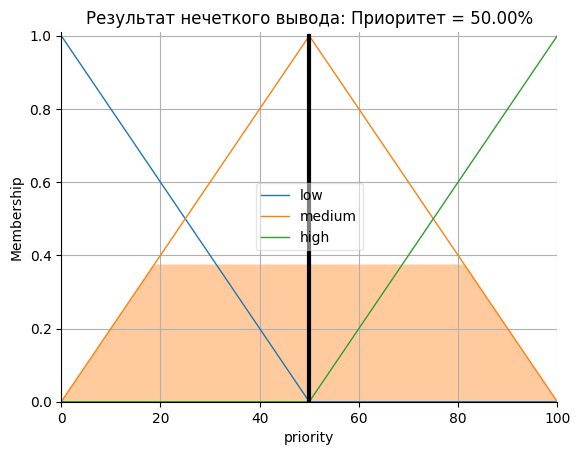


График результата построен!


In [ ]:
# Входные данные (выбраны случайно)
price_value = 45
needs_value = 75
compatibility_value = 85

print("\n" + "="*60)
print("НЕЧЕТКИЙ ВЫВОД ДЛЯ КОНКРЕТНЫХ ЗНАЧЕНИЙ")
print("="*60)

# Фаззификация
print("\nЭТАП 1: ФАЗЗИФИКАЦИЯ (перевод чисел в степени принадлежности)")
print(f"Цена = {price_value}:")
print(f"  - 'низкая': {fuzz.interp_membership(price.universe, price['low'].mf, price_value):.3f}")
print(f"  - 'средняя': {fuzz.interp_membership(price.universe, price['medium'].mf, price_value):.3f}")
print(f"  - 'высокая': {fuzz.interp_membership(price.universe, price['high'].mf, price_value):.3f}")

print(f"\nПотребности = {needs_value}:")
print(f"  - 'базовые': {fuzz.interp_membership(needs.universe, needs['basic'].mf, needs_value):.3f}")
print(f"  - 'продвинутые': {fuzz.interp_membership(needs.universe, needs['advanced'].mf, needs_value):.3f}")
print(f"  - 'экспертные': {fuzz.interp_membership(needs.universe, needs['expert'].mf, needs_value):.3f}")

print(f"\nСовместимость = {compatibility_value}:")
print(f"  - 'низкая': {fuzz.interp_membership(compatibility.universe, compatibility['low'].mf, compatibility_value):.3f}")
print(f"  - 'средняя': {fuzz.interp_membership(compatibility.universe, compatibility['medium'].mf, compatibility_value):.3f}")
print(f"  - 'хорошая': {fuzz.interp_membership(compatibility.universe, compatibility['good'].mf, compatibility_value):.3f}")

# Передача значений в симулятор и выполнение вывода
priority_sim.input['price'] = price_value
priority_sim.input['needs'] = needs_value
priority_sim.input['compatibility'] = compatibility_value

# Вычисление результата
priority_sim.compute()
result = priority_sim.output['priority']

print("\nЭТАП 2-4: АГРЕГАЦИЯ, АККУМУЛЯЦИЯ И ДЕФАЗЗИФИКАЦИЯ")
print("   (применение правил, объединение результатов и расчет центроида)")
print("\n" + "="*60)
print(f" РЕЗУЛЬТАТ: Приоритет покупки = {result:.2f}%")
print("="*60)

# Интерпретация результата
print("\nИНТЕРПРЕТАЦИЯ:")
if result < 33:
    print("   ⏬ НИЗКИЙ приоритет (покупка не рекомендуется)")
elif result < 66:
    print("   ⏸️ СРЕДНИЙ приоритет (можно рассмотреть)")
else:
    print("   ⏫ ВЫСОКИЙ приоритет (рекомендуется к покупке)")

# Визуализация результата
priority.view(sim=priority_sim)
plt.title(f'Результат нечеткого вывода: Приоритет = {result:.2f}%')
plt.grid(True)
plt.show()
print("\nГрафик результата построен!")